In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
# Load the image in grayscale
image_path = '../IMAGES/test_img.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

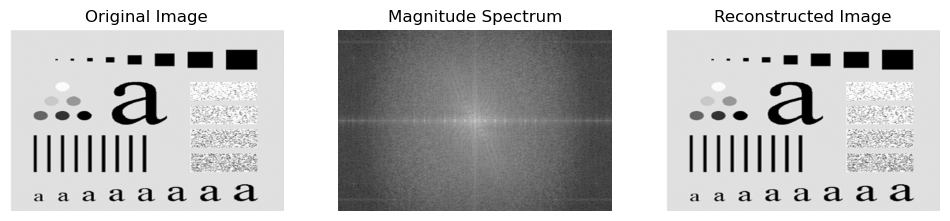

In [26]:
# 1. Take an image and apply Fourier Transform on it. Display original, Transformed and inverse transformed image.


# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Apply Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Apply inverse Fourier Transform
f_ishift = np.fft.ifftshift(f_shift)
image_reconstructed = np.fft.ifft2(f_ishift)
image_reconstructed = np.abs(image_reconstructed)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(133)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


In [28]:
# 2. Perform image smoothing on an image using


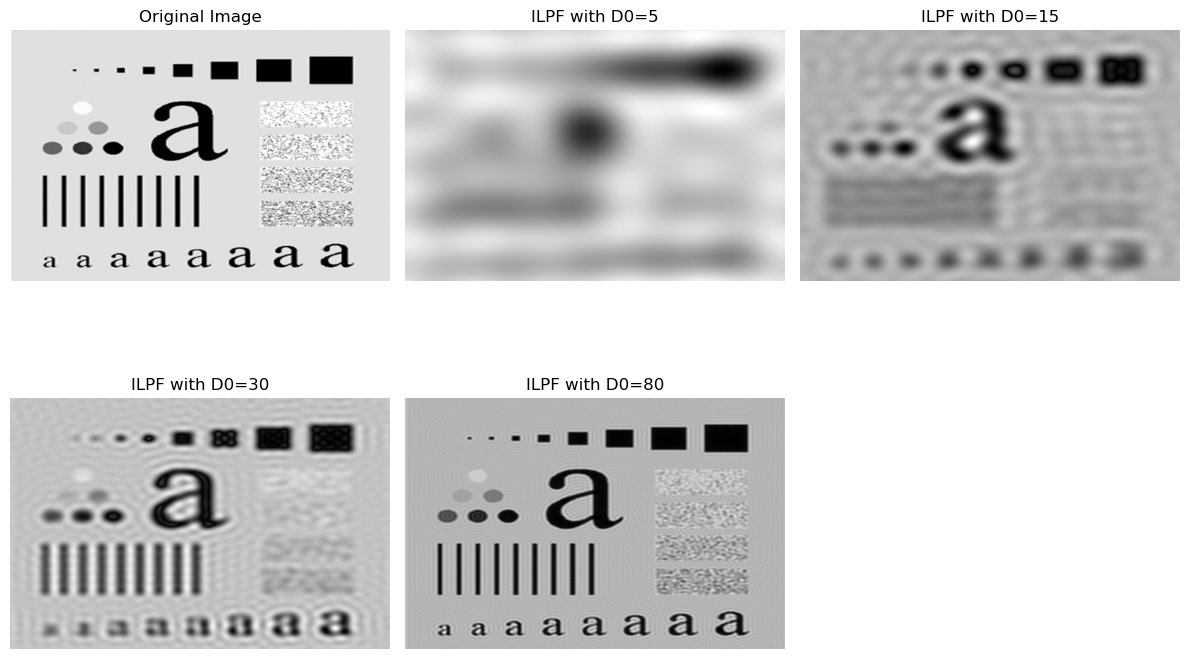

In [30]:
# Ideal Low pass filter (Use different cut off frequency D0=5, 15, 30, 80 )
def ideal_low_pass_filter(shape, D0):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            if D <= D0:
                H[u, v] = 1
    return H

def apply_filter(image, D0):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Ideal Low Pass Filter
    H = ideal_low_pass_filter(image.shape, D0)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered


# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define different cut-off frequencies
cut_off_frequencies = [5, 15, 30, 80]

# Apply filters with different cut-off frequencies
filtered_images = [apply_filter(image, D0) for D0 in cut_off_frequencies]

# Display the original and filtered images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (D0, filtered_image) in enumerate(zip(cut_off_frequencies, filtered_images), start=2):
    plt.subplot(2, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'ILPF with D0={D0}')
    plt.axis('off')

plt.tight_layout()
plt.show()


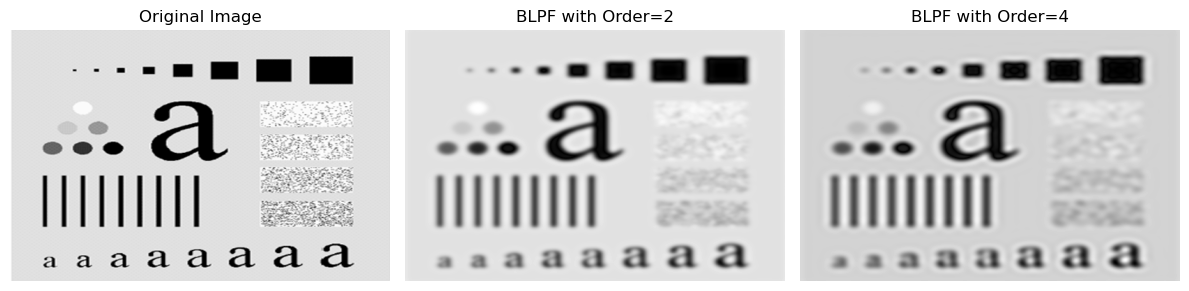

In [32]:
# Butterworth Low pass filter (same cut off frequency) of Order 2 and Order 4
def butterworth_low_pass_filter(shape, D0, n):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            H[u, v] = 1 / (1 + (D / D0)**(2 * n))
    return H

def apply_filter(image, D0, n):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Butterworth Low Pass Filter
    H = butterworth_low_pass_filter(image.shape, D0, n)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define the cut-off frequency
D0 = 30  # You can change this value

# Apply Butterworth filters with different orders
orders = [2, 4]
filtered_images = [apply_filter(image, D0, n) for n in orders]

# Display the original and filtered images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (n, filtered_image) in enumerate(zip(orders, filtered_images), start=2):
    plt.subplot(1, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'BLPF with Order={n}')
    plt.axis('off')

plt.tight_layout()
plt.show()


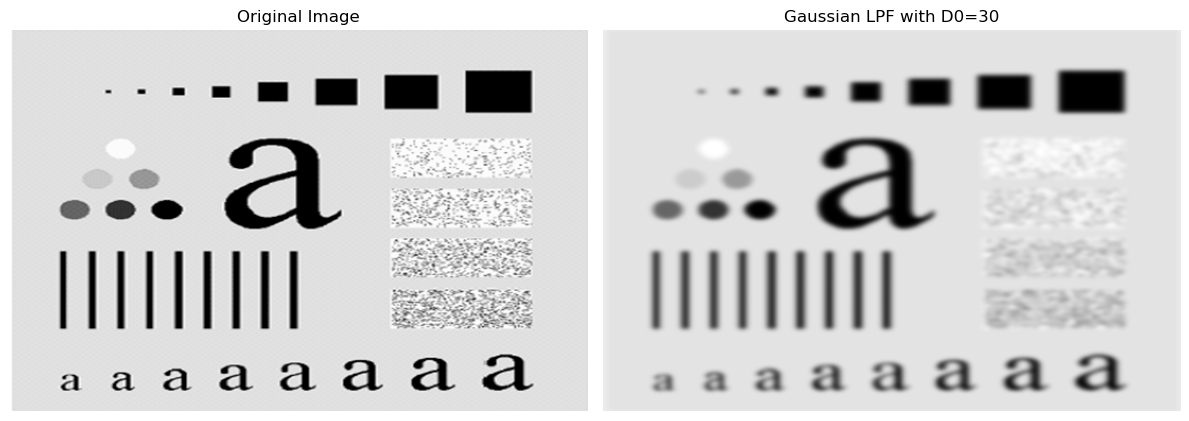

In [34]:
# Gaussian Low pass filter (same cut-off frequency)
def gaussian_low_pass_filter(shape, D0):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            H[u, v] = np.exp(-(D**2) / (2 * (D0**2)))
    return H

def apply_filter(image, D0):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Gaussian Low Pass Filter
    H = gaussian_low_pass_filter(image.shape, D0)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define the cut-off frequency
D0 = 30  # You can change this value

# Apply the Gaussian Low Pass Filter
filtered_image = apply_filter(image, D0)

# Display the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title(f'Gaussian LPF with D0={D0}')
plt.axis('off')

plt.tight_layout()
plt.show()


In [36]:
# 3. Perform image sharpening on an image using


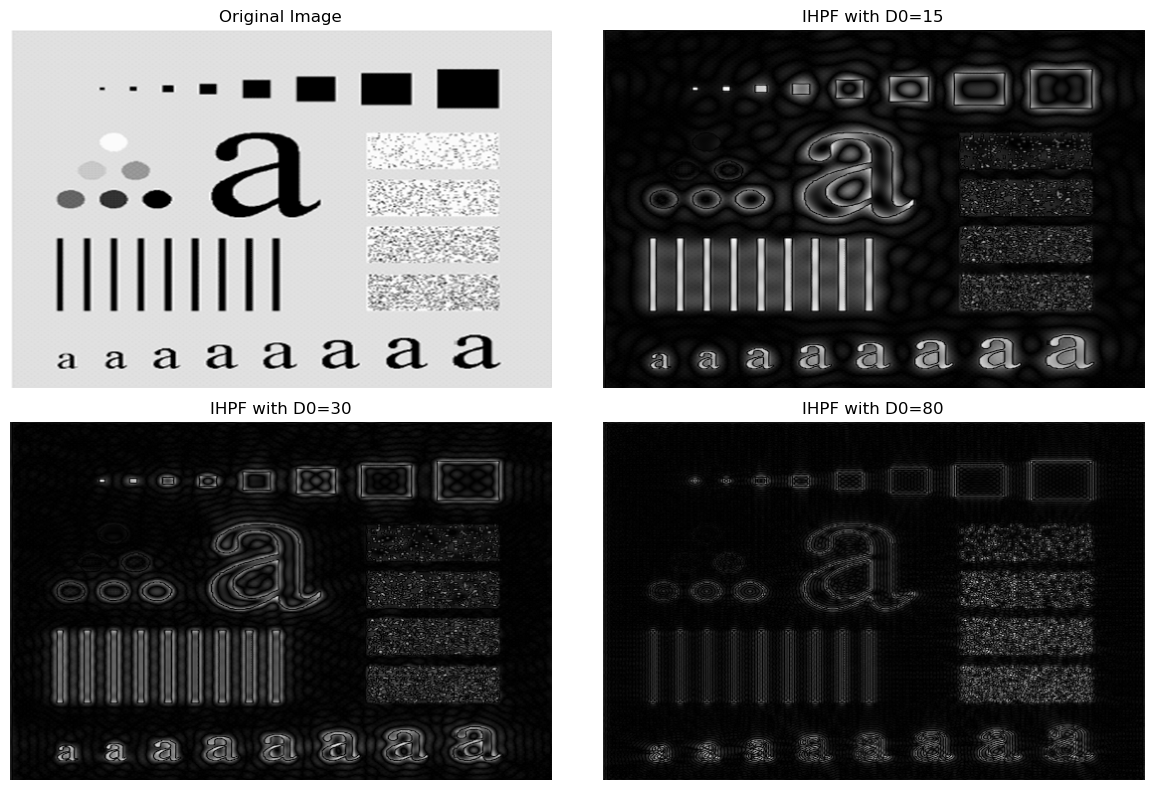

In [38]:
# Ideal High pass filter (Use different cut off frequency D0= 15, 30, 80 )
def ideal_high_pass_filter(shape, D0):
    P, Q = shape
    H = np.ones((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            if D <= D0:
                H[u, v] = 0
    return H

def apply_filter(image, D0):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Ideal High Pass Filter
    H = ideal_high_pass_filter(image.shape, D0)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define different cut-off frequencies
cut_off_frequencies = [15, 30, 80]

# Apply filters with different cut-off frequencies
filtered_images = [apply_filter(image, D0) for D0 in cut_off_frequencies]

# Display the original and filtered images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (D0, filtered_image) in enumerate(zip(cut_off_frequencies, filtered_images), start=2):
    plt.subplot(2, 2, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'IHPF with D0={D0}')
    plt.axis('off')

plt.tight_layout()
plt.show()


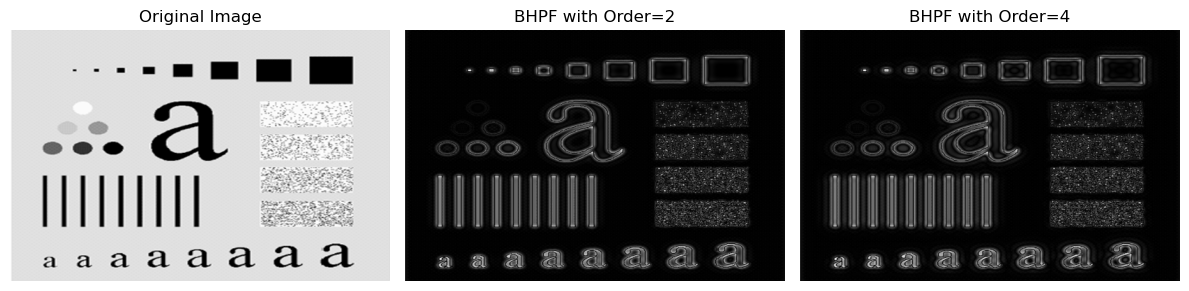

In [40]:
# Butterworth High pass filter of order 2 and order 4
def butterworth_high_pass_filter(shape, D0, n):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            if D != 0:
                H[u, v] = 1 / (1 + (D0 / D)**(2 * n))
            else:
                H[u, v] = 0
    return H

def apply_filter(image, D0, n):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Butterworth High Pass Filter
    H = butterworth_high_pass_filter(image.shape, D0, n)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered


# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define the cut-off frequency
D0 = 30  # You can change this value

# Apply Butterworth filters with different orders
orders = [2, 4]
filtered_images = [apply_filter(image, D0, n) for n in orders]

# Display the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (n, filtered_image) in enumerate(zip(orders, filtered_images), start=2):
    plt.subplot(1, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'BHPF with Order={n}')
    plt.axis('off')

plt.tight_layout()
plt.show()


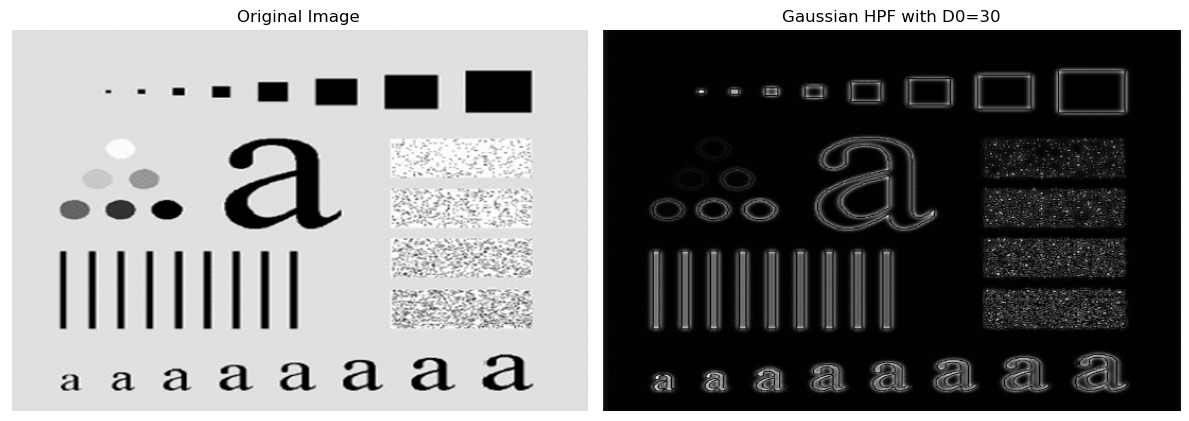

In [42]:
# Gaussian High pass filter (same cut-off frequency)
def gaussian_high_pass_filter(shape, D0):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    center = (P // 2, Q // 2)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - center[0])**2 + (v - center[1])**2)
            H[u, v] = 1 - np.exp(-(D**2) / (2 * (D0**2)))
    return H

def apply_filter(image, D0):
    # Fourier Transform
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    
    # Create and apply the Gaussian High Pass Filter
    H = gaussian_high_pass_filter(image.shape, D0)
    filtered_shift = f_shift * H
    
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(filtered_shift)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    
    return image_filtered


# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
    exit()

# Define the cut-off frequency
D0 = 30  # You can change this value

# Apply the Gaussian High Pass Filter
filtered_image = apply_filter(image, D0)

# Display the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title(f'Gaussian HPF with D0={D0}')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Note: 1.  For Q. 2 and 3, Display, input, filtered and Reconstructed image.
#          2. You have to show results on two images:
#             a. Use your own image 
#             b. Use Test image provided in the attachment.